# Converting SQLite Tables to CSVs for SQL Server

**Overview:** This process involves extracting data from an **SQLite database**, converting the tables into **CSV files**, and then uploading them to **SQL Server**.

Challenges:  
- Working on a company laptop with restrictions.  
- Unable to download SQLite directly.  

**Solution:**  
- Extract data from SQLite tables.  
- Convert them into CSV format.  
- Import the CSVs into SQL Server for further use.  

---

In [1]:

import sqlite3
import pandas as pd
import os

# Define database path
db_path = r"C:\Users\bryan\Documents\data.db"  

# Connect to SQLite database
conn = sqlite3.connect(db_path)

# Get list of tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

# Create output directory for CSVs
output_dir = r"C:\Users\bryan\Documents\data\exported_csv"
os.makedirs(output_dir, exist_ok=True)

# Export each table to CSV
for table in tables["name"]:
    df = pd.read_sql(f"SELECT * FROM {table};", conn)
    csv_path = os.path.join(output_dir, f"{table}.csv")
    df.to_csv(csv_path, index=False)
    print(f"Exported: {csv_path}")

conn.close()
print("✅ All tables exported successfully!")

Exported: C:\Users\bryan\Documents\data\exported_csv\events.csv
Exported: C:\Users\bryan\Documents\data\exported_csv\people.csv
✅ All tables exported successfully!


# 📡 Connecting to SQL Server & Retrieving Data

**Overview:**  
This script establishes a connection to a **SQL Server database** using **Windows Authentication**.  

**Process:** 
- Retrieves data from two tables: **`events`** and **`people`**.  
- Loads the data into **Pandas DataFrames** for analysis.  
- Closes the database connection after retrieval.  
- Displays sample data from both tables.  

---



In [2]:
import pyodbc
import pandas as pd

# Database Connection Parameters
server = r'LAPTOP-41ANRRTL\SQLEXPRESS'  #  SQL Server instance
database = 'sqldata'  #database name
trusted_connection = 'yes'  # Windows Authentication

# Establish Connection
conn = pyodbc.connect(f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection={trusted_connection};')

# Query Tables into DataFrames
query_events = "SELECT * FROM dbo.events"
query_people = "SELECT * FROM dbo.people"

df_events = pd.read_sql(query_events, conn)
df_people = pd.read_sql(query_people, conn)

# Close Connection
conn.close()

# Display Data
print("Events Table Sample:")
print(df_events.head())

print("\nPeople Table Sample:")
print(df_people.head())

Events Table Sample:
   user_id interaction_type             interaction_date
0       18        page view  2023-02-25 14:14:41.0000000
1       52       link click  2024-05-22 06:02:13.0000000
2       22        page view  2024-02-15 11:47:36.0000000
3       72   video playback  2024-07-01 02:19:21.0000000
4       57   asset download  2023-09-02 18:02:44.0000000

People Table Sample:
   user_id first_name last_name          company                   email  \
0        1      Diana     Brown         Hera Inc         dbrown@hera.com   
1        2     Bonnie     Henry       Apollo Ltd       bhenry@apollo.com   
2        3   Kimberly    Levine  Aphrodite Group   klevine@aphrodite.com   
3        4     Stacey  Martinez       Hestia Ltd    smartinez@hestia.com   
4        5     Sandra   Sellers  Aphrodite Group  ssellers@aphrodite.com   

                  sign_up_date  
0  2023-09-27 22:50:08.0000000  
1  2024-07-24 18:15:06.0000000  
2  2024-04-22 07:27:28.0000000  
3  2024-06-10 14:51:26.000

# 📊 Exploring the `events` Table

**Overview:**  
This section examines the structure and quality of the **`events`** table. The goal is to understand its format, data completeness, and key characteristics.

**Analysis Steps:**  
- Display the **first few rows** to understand the table structure.  
- Check the **number of rows and columns**.  
- Provide an **overview of data types** and identify any **missing values**.  
- Generate **summary statistics** for numeric columns.  

**Key Findings:**  
- The table contains **10,000 interactions**.  
- There are **no missing values** in the dataset.  

---



In [3]:


# Display the first few rows to get a sense of the structure
print("---- First 5 rows of the events table ----")
display(df_events.head())

# Check the shape of the DataFrame (rows, columns)
print(f"Total rows: {df_events.shape[0]}, Total columns: {df_events.shape[1]}")

# Display the information about data types and missing values
print("---- DataFrame Info ----")
df_events.info()

# Get summary statistics for numeric columns 
print("---- Summary Statistics ----")
display(df_events.describe())

# Check for missing values in each column
print("---- Missing Values per Column ----")
print(df_events.isnull().sum())

---- First 5 rows of the events table ----


,user_id,interaction_type,interaction_date
0,18,page view,2023-02-25 14:14:41.0000000
1,52,link click,2024-05-22 06:02:13.0000000
2,22,page view,2024-02-15 11:47:36.0000000
3,72,video playback,2024-07-01 02:19:21.0000000
4,57,asset download,2023-09-02 18:02:44.0000000


Total rows: 10000, Total columns: 3
---- DataFrame Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           10000 non-null  int64 
 1   interaction_type  10000 non-null  object
 2   interaction_date  10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB
---- Summary Statistics ----


,user_id
count,10000.000000
mean,48.882200
std,28.771397
min,0.000000
25%,24.000000
50%,49.000000
75%,73.000000
max,99.000000


---- Missing Values per Column ----
user_id             0
interaction_type    0
interaction_date    0
dtype: int64


# 🧑‍💼 Exploring the `people` Table  

**Overview:**  
This section examines the structure and quality of the **`people`** table to ensure data completeness and consistency.  

**Analysis Steps:**  
- Display the **first few rows** to understand its structure.  
- Check the **total number of rows and columns**.  
- Provide an **overview of data types** and identify any **missing values**.  
- Generate **summary statistics** for numeric columns. 
- Count the **number of unique user IDs**.  

**Key Findings:**  
- The table contains **100 unique user IDs**.  
- There are **no missing values** in the dataset.  

---



In [4]:
# Step 2: Explore the People Table

# Display the first few rows to get a sense of the structure
print("---- First 5 rows of the people table ----")
display(df_people.head())

# Check the shape of the DataFrame (rows, columns)
print(f"Total rows: {df_people.shape[0]}, Total columns: {df_people.shape[1]}")

# Display the information about data types and missing values
print("---- DataFrame Info ----")
df_people.info()

# Get summary statistics for numeric columns (if any)
print("---- Summary Statistics ----")
display(df_people.describe())

# Check for missing values in each column
print("---- Missing Values per Column ----")
print(df_people.isnull().sum())


---- First 5 rows of the people table ----


,user_id,first_name,last_name,company,email,sign_up_date
0,1,Diana,Brown,Hera Inc,dbrown@hera.com,2023-09-27 22:50:08.0000000
1,2,Bonnie,Henry,Apollo Ltd,bhenry@apollo.com,2024-07-24 18:15:06.0000000
2,3,Kimberly,Levine,Aphrodite Group,klevine@aphrodite.com,2024-04-22 07:27:28.0000000
3,4,Stacey,Martinez,Hestia Ltd,smartinez@hestia.com,2024-06-10 14:51:26.0000000
4,5,Sandra,Sellers,Aphrodite Group,ssellers@aphrodite.com,2024-04-11 04:08:41.0000000


Total rows: 100, Total columns: 6
---- DataFrame Info ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       100 non-null    int64 
 1   first_name    100 non-null    object
 2   last_name     100 non-null    object
 3   company       100 non-null    object
 4   email         100 non-null    object
 5   sign_up_date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
---- Summary Statistics ----


,user_id
count,100.000000
mean,50.500000
std,29.011492
min,1.000000
25%,25.750000
50%,50.500000
75%,75.250000
max,100.000000


---- Missing Values per Column ----
user_id         0
first_name      0
last_name       0
company         0
email           0
sign_up_date    0
dtype: int64


# 🔍 Checking for Invalid Dates  

This converts `interaction_date` (in `df_events`) and `sign_up_date` (in `df_people`) to **datetime format**, handling errors by setting invalid values to **NaT**.  

### Key Steps:  
- **Convert dates** while replacing invalid values with `NaT`.  
- **Count the number of invalid/malformed dates** using `.isna().sum()`.  
- **Print the results** to show how many dates failed conversion.  

This helps identify **missing or incorrectly formatted dates** in the dataset which will help for the segment analysis later on.  
We can see that there are no issues with any of the dates in both tables.

In [5]:



df_events['interaction_date'] = pd.to_datetime(df_events['interaction_date'], errors='coerce')
df_people['sign_up_date'] = pd.to_datetime(df_people['sign_up_date'], errors='coerce')

# Count how many dates were set to NaT due to conversion errors
invalid_interaction_dates = df_events['interaction_date'].isna().sum()
invalid_sign_up_dates = df_people['sign_up_date'].isna().sum()

print(f"Invalid or malformed interaction dates: {invalid_interaction_dates}")
print(f"Invalid or malformed sign-up dates: {invalid_sign_up_dates}")


Invalid or malformed interaction dates: 0
Invalid or malformed sign-up dates: 0


# 📊 Customer & Company Interaction Analysis

### 🔍 Overview  
This script analyses customer and company interactions based on event data, identifying high and low engagement levels.

### 🚀 Key Steps:
1. **Merge Data**: Combines `events` and `people` tables using `user_id` to include customer and company details.
2. **Calculate Interactions**:  
   - Counts interactions per **customer**.  
   - Counts interactions per **company**.  
3. **Identify Engagement Levels**:  
   - Extracts **top 20** and **bottom 20** customers by interaction count.  
   - Extracts **top 20** and **bottom 20** companies by interaction count.  
4. **Visualisation**:  
   - Creates bar charts to display engagement trends.  
   - Annotates interaction counts on each bar


# 🔍 Customer Interaction Insights

- The **interaction count ranges from 0 to 126**, meaning some customers are **highly engaged**, while others have **little to no activity**.  
- Several customers have **fewer than 10 interactions**, which may indicate **inactive or low-engagement users**.  
- A few customers have **exceptionally high interaction counts (100+)**, suggesting they are **power users**.  

### 🎯 Potential Actions:
- **Investigate low-engagement customers**—are they inactive, or do they need additional support?  
- **Identify top-engaging users** and explore why they interact more frequently—could they be **loyal customers or power users**?  

------------

# 📊 Company Interaction Analysis  

- **High Engagement:** Apollo Ltd (**1,790**), Hephaestus Ltd (**1,197**), and Athena LLC (**1,067**) have the highest interactions, indicating strong user engagement.  
- **Moderate Usage:** Hermes Group, Ares LLC, Hestia Ltd, Hera Inc, Demeter LLC, and Zeus and Sons show **steady** interaction levels.  
- **Lower Engagement:** Artemis PLC (**507**), Aphrodite Group (**401**), and Poseidon LLC (**292**) have **lower activity**, suggesting potential for improvement.  

### 🎯 Next Steps:  
- **Analyse** top companies to identify success factors.  
- **Investigate** lower-engagement firms to improve adoption.  
- **Monitor trends** to track engagement shifts over time.  



---- Full List of Customers and Their Interaction Counts ----


user_id,first_name,last_name,company,email,sign_up_date,interaction_count,full_name
1,Diana,Brown,Hera Inc,dbrown@hera.com,2023-09-27 22:50:08,105,Diana Brown
2,Bonnie,Henry,Apollo Ltd,bhenry@apollo.com,2024-07-24 18:15:06,111,Bonnie Henry
3,Kimberly,Levine,Aphrodite Group,klevine@aphrodite.com,2024-04-22 07:27:28,117,Kimberly Levine
4,Stacey,Martinez,Hestia Ltd,smartinez@hestia.com,2024-06-10 14:51:26,91,Stacey Martinez
5,Sandra,Sellers,Aphrodite Group,ssellers@aphrodite.com,2024-04-11 04:08:41,108,Sandra Sellers
6,Jessica,Foster,Apollo Ltd,jfoster@apollo.com,2024-05-13 10:26:39,99,Jessica Foster
7,Desiree,Copeland,Hephaestus Ltd,dcopeland@hephaestus.com,2024-04-12 06:32:28,93,Desiree Copeland
8,Bradley,Brown,Hermes Group,bbrown@hermes.com,2023-10-18 14:09:53,110,Bradley Brown
9,Katelyn,Allen,Ares LLC,kallen@ares.com,2023-08-09 00:23:52,105,Katelyn Allen
10,Anna,Morales,Hephaestus Ltd,amorales@hephaestus.com,2023-06-06 10:48:45,101,Anna Morales


---- Top 20 Customers by Interaction Count ----


user_id,full_name,company,interaction_count
57,Stuart Pacheco,Hermes Group,126
50,Richard Allen,Athena LLC,121
58,Amy Lawrence,Hephaestus Ltd,120
3,Kimberly Levine,Aphrodite Group,117
19,Molly Ramirez,Apollo Ltd,117
97,Jose Elliott,Hermes Group,116
94,Margaret Cunningham,Apollo Ltd,116
43,Cynthia Silva,Zeus and Sons,115
41,Michael Vazquez,Ares LLC,114
18,Marcus Shepherd,Artemis PLC,114


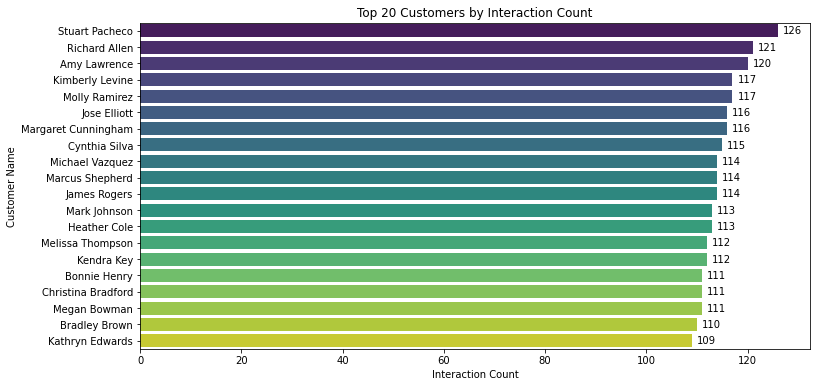

---- Bottom 20 Customers by Interaction Count ----


user_id,full_name,company,interaction_count
100,Daniel Jackson,Athena LLC,0
72,Nathaniel Burgess,Hera Inc,67
80,Maria Wong,Zeus and Sons,76
81,Matthew Lawson,Apollo Ltd,79
91,Ross Garcia,Hermes Group,81
78,Sherri Crane,Hera Inc,86
84,Barbara Davis,Aphrodite Group,86
92,Craig Dunn,Hephaestus Ltd,87
36,Cameron Brown,Hestia Ltd,88
46,Sarah Cooper,Apollo Ltd,89


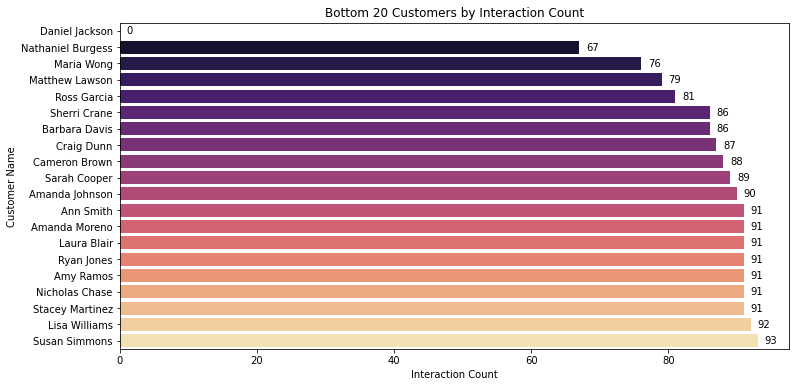

---- All Companies by Interaction Count ----


company,interaction_count
Apollo Ltd,1790
Hephaestus Ltd,1197
Athena LLC,1067
Hermes Group,930
Ares LLC,820
Hestia Ltd,786
Hera Inc,758
Demeter LLC,696
Zeus and Sons,680
Artemis PLC,507


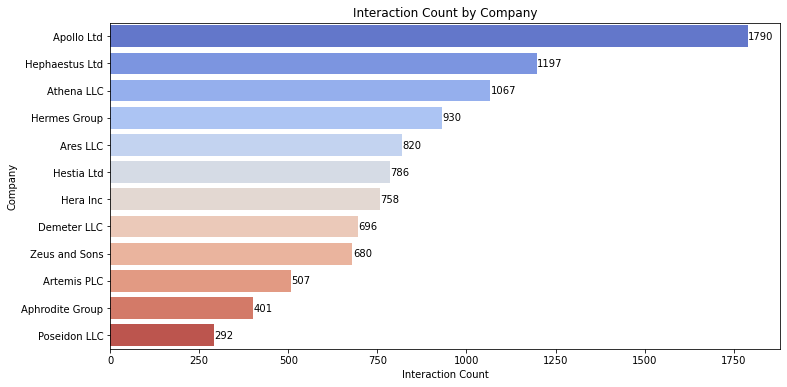

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots appear inline in Jupyter Notebook
%matplotlib inline

# =============================================================================
# Step 1: Merge Data for Company-Level Analysis
# =============================================================================
# Merge the events and people tables on 'user_id' to bring company and name info into each event.
df_merged = pd.merge(
    df_events, 
    df_people[['user_id', 'company', 'first_name', 'last_name']], 
    on='user_id', 
    how='left'
)

# Create a full_name column for better visualisation
df_merged['full_name'] = df_merged['first_name'] + " " + df_merged['last_name']

# =============================================================================
# Step 2: Calculate Interactions Per Customer
# =============================================================================

# --- Interactions per Customer ---
# Calculate total interactions for each customer from the events table.
user_interaction_counts = df_events.groupby('user_id').size().reset_index(name='interaction_count')

# Merge with the people table to include user details (name, company, etc.)
user_details = pd.merge(df_people, user_interaction_counts, on='user_id', how='left')
user_details['interaction_count'] = user_details['interaction_count'].fillna(0).astype(int)
user_details['full_name'] = user_details['first_name'] + " " + user_details['last_name']

# Display the full list of customers with their interaction counts (without the default index).
print("---- Full List of Customers and Their Interaction Counts ----")
display(user_details.sort_values(by='user_id').style.hide_index())

# =============================================================================
# Step 3: Customer Usage: Top 20 and Bottom 20
# =============================================================================

# --- For Customers ---
# Get the top 20 customers (highest interaction count)
top20_customers = user_details.sort_values(by='interaction_count', ascending=False).head(20)
print("---- Top 20 Customers by Interaction Count ----")
display(top20_customers[['user_id', 'full_name', 'company', 'interaction_count']].style.hide_index())

# Visualisation for Top 20 Customers
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top20_customers, x='interaction_count', y='full_name', palette='viridis')
plt.title("Top 20 Customers by Interaction Count")
plt.xlabel("Interaction Count")
plt.ylabel("Customer Name")
# Annotate each bar with its interaction count
for i, v in enumerate(top20_customers['interaction_count']):
    ax.text(v + 1, i, str(v), color='black', va='center')
plt.show()

# Get the bottom 20 customers (lowest interaction count)
bottom20_customers = user_details.sort_values(by='interaction_count', ascending=True).head(20)
print("---- Bottom 20 Customers by Interaction Count ----")
display(bottom20_customers[['user_id', 'full_name', 'company', 'interaction_count']].style.hide_index())

# Visualisation for Bottom 20 Customers
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom20_customers, x='interaction_count', y='full_name', palette='magma')
plt.title("Bottom 20 Customers by Interaction Count")
plt.xlabel("Interaction Count")
plt.ylabel("Customer Name")
# Annotate each bar with its interaction count
for i, v in enumerate(bottom20_customers['interaction_count']):
    ax.text(v + 1, i, str(v), color='black', va='center')
plt.show()

# =============================================================================
# Step 4: Company Usage (Single Chart and Table)
# =============================================================================

# Group the merged DataFrame by company to get the total interactions per company.
company_interaction_counts = df_merged.groupby('company').size().reset_index(name='interaction_count')

# Sort by interaction count (descending)
company_interaction_counts = company_interaction_counts.sort_values(by='interaction_count', ascending=False)

print("---- All Companies by Interaction Count ----")
display(company_interaction_counts.style.hide_index())

# Visualise ALL companies in a single bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=company_interaction_counts, x='interaction_count', y='company', palette='coolwarm')
plt.title("Interaction Count by Company")
plt.xlabel("Interaction Count")
plt.ylabel("Company")
# Annotate each bar with its interaction count
for i, v in enumerate(company_interaction_counts['interaction_count']):
    ax.text(v + 1, i, str(v), color='black', va='center')
plt.show()


# 🔍 Customer Segmentation using Recency–Frequency Analysis  

## 🎯 Overview:  
This code segments customers based on **Recency (R)** and **Frequency (F)** using **K-Means clustering**.  
The goal is to identify different customer groups based on their engagement patterns.  

## 🚀 Key Steps:  

### **Step 1: Compute Recency**  
- Determine the **last interaction date** for each user.  
- Calculate **Recency** as the number of days since the last interaction (compared to the most recent event date).  

### **Step 2: Compute Frequency**  
- Count the **total number of interactions** per user (Frequency).  
- Merge Recency and Frequency data to create a **customer segmentation dataset**.  

### **Step 3: Preprocessing for Clustering**  
- Standardise **Recency and Frequency** using **`StandardScaler()`** to normalise the data.  
- Check for missing values and drop inactive users from the dataset.  

### **Step 4: Apply K-Means Clustering**  
- Fit a **K-Means model** with **3 clusters** to segment customers.  
- Assign a cluster label to each user based on their interaction patterns.  

### **Step 5: Visualisation**  
- Create a **scatter plot** of **Recency vs Frequency**, colour-coded by cluster groups.  
- Generate a **styled segmentation table** with background colours for each cluster.  




NaNs in rf_data: recency      0
frequency    0
dtype: int64


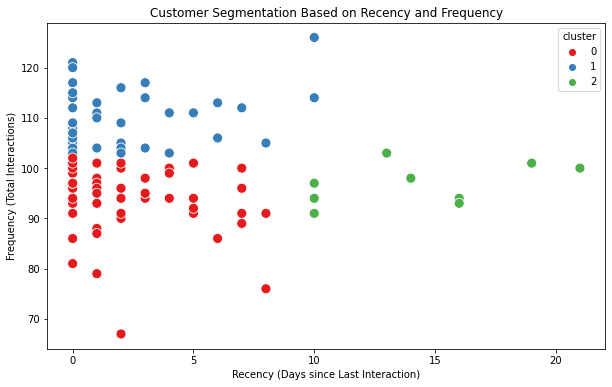

user_id,full_name,company,email,sign_up_date,interaction_count,recency,cluster
99,Ann Smith,Hephaestus Ltd,asmith@hephaestus.com,2022-10-29 10:51:41,91,8,0
76,Paul Anderson,Ares LLC,panderson@ares.com,2022-10-23 19:14:10,97,0,0
34,Brittany Cannon,Hera Inc,bcannon@hera.com,2024-01-22 20:49:23,101,0,0
35,Susan Simmons,Hera Inc,ssimmons@hera.com,2024-07-19 16:56:19,93,1,0
36,Cameron Brown,Hestia Ltd,cbrown@hestia.com,2024-03-12 02:35:31,88,1,0
75,Kimberly Ritter,Demeter LLC,kritter@demeter.com,2023-10-21 17:14:09,96,7,0
38,Amanda Moreno,Demeter LLC,amoreno@demeter.com,2024-06-08 04:12:15,91,7,0
39,Shannon Smith,Hermes Group,ssmith@hermes.com,2022-10-22 23:46:15,100,4,0
40,Danny Walsh,Poseidon LLC,dwalsh@poseidon.com,2023-11-21 22:40:13,100,7,0
73,Valerie Thomas,Apollo Ltd,vthomas@apollo.com,2024-03-30 12:40:02,96,1,0


User Segmentation Table (Ordered by Cluster):


,user_id,first_name,last_name,company,email,sign_up_date,interaction_count,full_name,recency,cluster
98,99,Ann,Smith,Hephaestus Ltd,asmith@hephaestus.com,2022-10-29 10:51:41,91,Ann Smith,8.0,0
75,76,Paul,Anderson,Ares LLC,panderson@ares.com,2022-10-23 19:14:10,97,Paul Anderson,0.0,0
33,34,Brittany,Cannon,Hera Inc,bcannon@hera.com,2024-01-22 20:49:23,101,Brittany Cannon,0.0,0
34,35,Susan,Simmons,Hera Inc,ssimmons@hera.com,2024-07-19 16:56:19,93,Susan Simmons,1.0,0
35,36,Cameron,Brown,Hestia Ltd,cbrown@hestia.com,2024-03-12 02:35:31,88,Cameron Brown,1.0,0
...,...,...,...,...,...,...,...,...,...,...
92,93,Carl,Fox,Hestia Ltd,cfox@hestia.com,2024-03-19 19:42:46,93,Carl Fox,16.0,2
68,69,William,Turner,Demeter LLC,wturner@demeter.com,2022-10-08 11:35:08,94,William Turner,10.0,2
28,29,Nicholas,Chase,Zeus and Sons,nchase@zeus.com,2024-04-06 13:23:29,91,Nicholas Chase,10.0,2
66,67,Charles,Schmidt,Athena LLC,cschmidt@athena.com,2023-07-27 02:46:14,103,Charles Schmidt,13.0,2


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure plots appear inline (for Jupyter Notebook)
%matplotlib inline

# =============================================================================
# Advanced Analytics: Customer Segmentation (Recency–Frequency Analysis)
# =============================================================================
# We already computed 'interaction_count' per user in our earlier analysis (user_details).
# Now, we will compute recency and then apply clustering.
# =============================================================================

# Step 1: Compute the last interaction date for each customer.
last_interaction = df_events.groupby('user_id')['interaction_date'].max().reset_index()
last_interaction.columns = ['user_id', 'last_interaction_date']

# Choose a reference date. We'll use the maximum interaction date in df_events as the reference.
reference_date = df_events['interaction_date'].max()

# Step 2: Calculate recency in days for each customer.
# Recency is the number of days since the customer's last interaction.
last_interaction['recency'] = (reference_date - last_interaction['last_interaction_date']).dt.days

# Step 3: Merge recency data with the customer interaction counts and details.
# We assume user_details is a DataFrame that contains columns: user_id, interaction_count, and customer info.
user_details = pd.merge(df_people, 
                        df_events.groupby('user_id').size().reset_index(name='interaction_count'), 
                        on='user_id', 
                        how='left')
# Fill missing interaction_count (users with no events) with 0
user_details['interaction_count'] = user_details['interaction_count'].fillna(0).astype(int)
# Create a full name for convenience
user_details['full_name'] = user_details['first_name'] + " " + user_details['last_name']

# Merge the recency values (users with no events will have missing recency)
user_segmentation = pd.merge(user_details, last_interaction[['user_id', 'recency']], on='user_id', how='left')

# Option 1: Drop users with missing recency (i.e., customers with no events)
user_segmentation = user_segmentation.dropna(subset=['recency'])
# Alternatively, you could impute recency with a default large value if desired.

# For clustering, we need two key variables:
# - Recency: number of days since last interaction.
# - Frequency: number of interactions (already available as interaction_count).
rf_data = user_segmentation[['recency', 'interaction_count']].copy()
rf_data.columns = ['recency', 'frequency']

# Check that there are no NaN values
print("NaNs in rf_data:", rf_data.isnull().sum())

# Step 4: Scale the data.
scaler = StandardScaler()
rf_data_scaled = scaler.fit_transform(rf_data)

# Step 5: Apply K-Means clustering.
# For simplicity, we choose 3 clusters here.
kmeans = KMeans(n_clusters=3, random_state=42)
rf_data['cluster'] = kmeans.fit_predict(rf_data_scaled)

# Step 6: Merge the cluster labels back into the main segmentation DataFrame.
user_segmentation['cluster'] = rf_data['cluster']

# Step 7: Visualise the customer segments without name annotations.
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=user_segmentation, x='recency', y='interaction_count', 
                     hue='cluster', palette='Set1', s=100)
plt.title("Customer Segmentation Based on Recency and Frequency")
plt.xlabel("Recency (Days since Last Interaction)")
plt.ylabel("Frequency (Total Interactions)")
plt.show()

# Step 8: Create a table of the users, ordered by cluster.

user_segmentation_sorted = user_segmentation.sort_values(by='cluster')

# Create the final table with the desired columns and order
final_table = user_segmentation_sorted[['user_id', 'full_name', 'company', 'email', 'sign_up_date', 
                                          'interaction_count', 'recency', 'cluster']]

# Define a function to apply a background color based on the cluster value
def highlight_cluster(row):
    if row['cluster'] == 0:
        color = 'lightsalmon'   # Light red
    elif row['cluster'] == 1:
        color = 'lightblue'
    elif row['cluster'] == 2:
        color = 'lightgreen'
    else:
        color = ''
    return ['background-color: ' + color] * len(row)

# Use the Pandas Styler to format the table:
styled_final_table = (final_table.style
                      .apply(highlight_cluster, axis=1)
                      .hide_index()
                      .format({
                          'recency': '{:.0f}',       # No decimals for recency
                          'interaction_count': '{:.0f}'  # Optionally, no decimals for interaction_count
                      }))

# Display the styled table
display(styled_final_table)







print("User Segmentation Table (Ordered by Cluster):")
display(user_segmentation_sorted)


# Detailed Analysis and Recommendations on Customer Segmentation (Recency–Frequency)


## Cluster Breakdown and Recommendations:

### Cluster 0: Regular Users (54 users)
- **Recency:** ~2 days (active users)
- **Interaction Count:** ~94 interactions (moderate engagement)
- **Insights:**  
  These users are regularly active but have room to increase their overall usage.
- **Recommendations:**  
  - **Enhance Onboarding and Engagement:** Leverage RavenPack’s GenAI to deliver personalised onboarding experiences and dynamic content, nudging users towards more frequent interaction.
  - **Upsell Advanced Features:** Introduce targeted promotions for our new GenAI and SaaS services to deepen integration into their financial workflows.
  - **Continuous Monitoring:** Use advanced analytics to track subtle changes in engagement and proactively address any emerging issues.

### Cluster 1: Power Users (36 users)
- **Recency:** ~1.5 days (very recent engagement)
- **Interaction Count:** ~110 interactions (highest engagement)
- **Insights:**  
  This group represents our most active and loyal users, who are already highly engaged.
- **Recommendations:**  
  - **Reward Loyalty:** Implement exclusive loyalty programmes or early access to new AI tools to reinforce their high engagement.
  - **Advocacy Initiatives:** Encourage these users to act as brand ambassadors by sharing their success stories, thereby attracting similar high-calibre clients.
  - **Feedback-Driven Innovation:** Leverage insights from their usage patterns to fine-tune and enhance our product offerings, ensuring they continue to meet the evolving needs of top financial institutions.

### Cluster 2: Lapsed Users (9 users)
- **Recency:** ~14 days (less active recently)
- **Interaction Count:** ~97 interactions (historically engaged but currently lapsed)
- **Insights:**  
  These users, despite having a solid historical engagement, have not interacted recently, signalling potential disengagement.
- **Recommendations:**  
  - **Re-Engagement Campaigns:** Deploy personalised re-engagement strategies—using AI-driven insights—to identify and resolve barriers to regular usage.
  - **Tailored Incentives:** Offer time-sensitive incentives or exclusive previews of upcoming features to motivate a return to regular activity.
  - **Solicit Feedback:** Proactively seek feedback to understand the drop in interaction and adjust our strategies to better meet their needs.

## Overall Strategic Approach for RavenPack:
- **Harness Advanced Analytics:** Use our GenAI and big data capabilities to predict engagement trends and personalise user experiences.
- **Drive Continuous Innovation:** Continuously refine our product suite based on customer segmentation insights, ensuring our services remain best-in-class for the finance industry.
- **Maximise Client Value:** Through targeted engagement, re-engagement, and loyalty initiatives, we can help our clients enhance returns, reduce risk, and increase operational efficiency.

.


In [9]:
# Define a function to apply a background color based on the cluster value
def highlight_cluster(row):
    if row['cluster'] == 0:
        color = 'lightsalmon'   # Light red for cluster 0
    elif row['cluster'] == 1:
        color = 'lightblue'      # Light blue for cluster 1
    elif row['cluster'] == 2:
        color = 'lightgreen'     # Light green for cluster 2
    else:
        color = ''
    return ['background-color: ' + color] * len(row)

# Create a summary table grouped by cluster
cluster_summary = user_segmentation.groupby('cluster').agg({
    'recency': ['mean', 'median'],
    'interaction_count': ['mean', 'median'],
    'user_id': 'count'
}).reset_index()

# Flatten the MultiIndex columns
cluster_summary.columns = [
    'cluster', 'recency_mean', 'recency_median',
    'interaction_count_mean', 'interaction_count_median', 'count'
]

# Round the values as desired
cluster_summary['recency_mean'] = cluster_summary['recency_mean'].round(0)
cluster_summary['recency_median'] = cluster_summary['recency_median'].round(2)
cluster_summary['interaction_count_mean'] = cluster_summary['interaction_count_mean'].round(2)
cluster_summary['interaction_count_median'] = cluster_summary['interaction_count_median'].round(2)

# Use Pandas Styler to format the table, apply the background color, and hide the default index
styled_cluster_summary = (cluster_summary.style
                            .apply(highlight_cluster, axis=1)
                            .format({
                                'recency_mean': '{:.0f}',       # 0 decimal places
                                'recency_median': '{:.2f}',
                                'interaction_count_mean': '{:.2f}',
                                'interaction_count_median': '{:.2f}',
                                'count': '{:.0f}'
                            })
                            .hide_index())

# Display the styled summary table
display(styled_cluster_summary)



cluster,recency_mean,recency_median,interaction_count_mean,interaction_count_median,count
0,2,2.00,94.00,95.50,54
1,2,1.50,110.47,110.50,36
2,14,14.00,96.78,97.00,9
